# Homework 4: GroupBy
Dr. Leslie Kerby </br>
Data Mining and Predictive Analytics</br>
Student's Name: 

In [8]:
import numpy as np
import pandas as pd
income = pd.read_csv('https://raw.githubusercontent.com/LGKerby/Python/master/en-2016-pssd-compendium.csv')
income.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,Abbas,Sadiq,"$105,595.39",$84.24,Algonquin College,Professor,2016
1,Colleges,Abboud,Nadim,"$108,393.10",$126.96,Algonquin College,Professor,2016
2,Colleges,Agate,Jeffery M.,"$125,779.64",$325.58,Algonquin College,"Associate Director, Student Support Services",2016
3,Colleges,Al-Azzawi,Abdul,"$105,595.41",$84.24,Algonquin College,Professor,2016
4,Colleges,Alexander,Doug,"$105,595.41",$126.96,Algonquin College,Professor,2016


**Question 1**</br>
Use apply to create a new column called 'Salary ($)' which contains salary as a number.

In [9]:
# Convert Salary Paid into a float called Salary ($)
income['Salary ($)'] = income['Salary Paid'].apply(lambda x : float(x.strip('$').replace(',','')) )
income.head()

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year,Salary ($)
0,Colleges,Abbas,Sadiq,"$105,595.39",$84.24,Algonquin College,Professor,2016,105595.39
1,Colleges,Abboud,Nadim,"$108,393.10",$126.96,Algonquin College,Professor,2016,108393.10
2,Colleges,Agate,Jeffery M.,"$125,779.64",$325.58,Algonquin College,"Associate Director, Student Support Services",2016,125779.64
3,Colleges,Al-Azzawi,Abdul,"$105,595.41",$84.24,Algonquin College,Professor,2016,105595.41
4,Colleges,Alexander,Doug,"$105,595.41",$126.96,Algonquin College,Professor,2016,105595.41


**Question 2**</br>
Use a boolean mask to create a subset of the `income` DataFrame (call it `universities`) that contains only Universities. Create a second subset DataFrame called `colleges` that contains only Colleges. </br>
*Hint: There are 36 universities (with a total of 18,923 employees) and 38 colleges (with a total of 5,677 employees) in the `income` dataset.*

In [10]:
# Group the data into universities and colleges
grouped = income.groupby('Sector')
universities = grouped.get_group('Universities')
colleges = grouped.get_group('Colleges')

print("Number of Universities: " + str(universities['Employer'].nunique()))
print("Number of Colleges: " + str(colleges['Employer'].nunique()))

Number of Universities: 35
Number of Colleges: 24


**Question 3**</br>
Calculate the average salary and standard deviation for employees at `universities` and compare it to the average salary and standard deviation for employees at `colleges`. </br>
Create histogram plots of the salaries for both `universities` and `colleges`. Show plots of both tally bins and as a probability distribution.
</br> What do you observe?

In [11]:
# Calculate the mean and standard deviation for universities and colleges
uni_avg_salary = universities['Salary ($)'].mean()
uni_std = universities['Salary ($)'].std()
col_avg_salary = colleges['Salary ($)'].mean()
col_std = colleges['Salary ($)'].std()

print('Universities mean, std: ' + str(uni_avg_salary) + ', ' + str(uni_std))
print('Colleges mean, std: ' + str(col_avg_salary) + ', ' + str(col_std))

Universities mean, std: 150235.6068185864, 42138.94640761162
Colleges mean, std: 113920.95960000026, 22498.801432702803


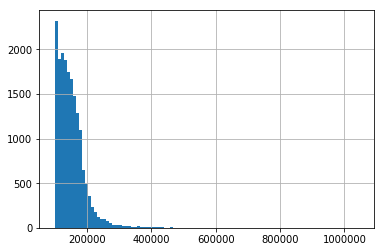

In [0]:
#Universities' tally bins
universities['Salary ($)'].hist(bins=100)

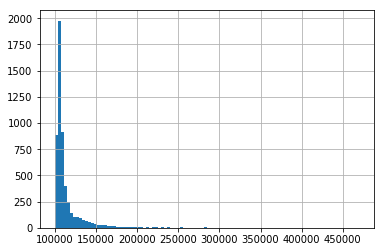

In [0]:
# Colleges tally bins
colleges['Salary ($)'].hist(bins=100)

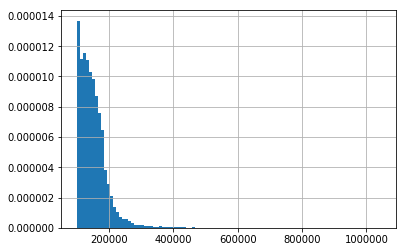

In [0]:
# Universities probability distribution
universities['Salary ($)'].hist(bins=100, density=True)

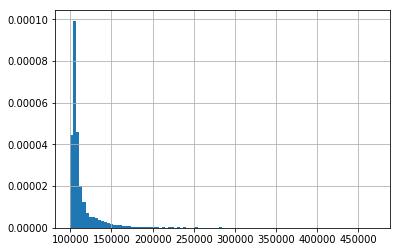

In [0]:
# Colleges probability distribution
colleges['Salary ($)'].hist(bins=100, density=True)

**Question 4**</br>
GroupBy `Employer` in the `universities` and `colleges` DataFrames. </br>
Plot a bar chart of the average salary for each Employer in `universities`. Do the same for `colleges`.</br>
Find the lowest and highest average-salary University. For each, how many employees do they have making over $100,000CAN? Do some basic internet searching on each university and hypothesize why they have the highest and lowest average high-income earners.

Universities:

The lowest average salary is 108079.97529411766 at Saint Paul University.
There are 17 employees making over $100,000CAN out of a total 17 employees.
The lowest salary at Saint Paul University is 100961.05.
Saint Paul University has the lowest average salary because the school only teaches canon law, human sciences, philosophy, and theology.


The highest average salary is 160999.19760912436 at University of Toronto.
There are 3551 employees making over $100,000CAN out of a total 3551 employees.
The lowest salary at University of Toronto is 100000.02.
University of Toronto has the highest average salary because the school has Arts and Science, Applied Science and Engineering, Architecture,
Landscape and Design, Medicine, Nursing, Pharmacy, Dentistry, Kinesiology and Physical Education, and Law departments.


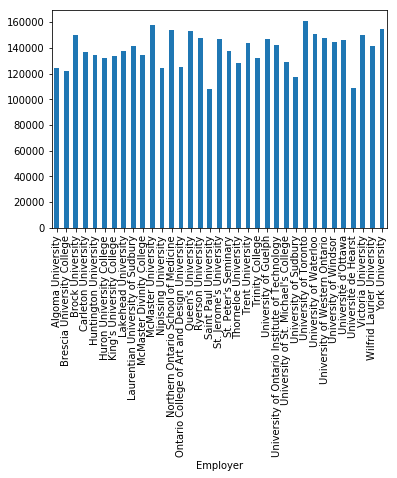

In [41]:
uni_employers = universities.groupby('Employer')

# Plot a bar chart of average salary of the employer
uni_avg_salary = uni_employers['Salary ($)'].mean()
uni_avg_salary.plot.bar()

print('Universities:\r\n')

# Determine the minimum average salary and name of the university
uni_min_avg_salary = min(uni_avg_salary)
uni_name_min_salary = uni_avg_salary.idxmin()
uni_employees_for_min =universities[universities['Employer'] == uni_name_min_salary]
uni_num_employees_for_min = len(uni_employees_for_min)

# Determine the number of employees with making more than $100,000 and find the lowest salary of the minimum average salary group
uni_num_employees_more_100000_for_min = len(uni_employees_for_min[uni_employees_for_min['Salary ($)'] > 100000])
uni_lowest_salary_of_min = min(uni_employees_for_min['Salary ($)'])

print('The lowest average salary is ' + str(uni_min_avg_salary) + ' at ' + str(uni_name_min_salary) + '.\r\nThere are ' + str(uni_num_employees_more_100000_for_min) + ' employees making over $100,000CAN out of a total ' + str(uni_num_employees_for_min) + ' employees.\r\nThe lowest salary at ' + str(uni_name_min_salary) + ' is ' + str(uni_lowest_salary_of_min) + '.\r\n' + str(uni_name_min_salary) + ' has the lowest average salary because the school only teaches canon law, human sciences, philosophy, and theology.\r\n\r\n')

# Determine the maximum average salary and name of the university
uni_max_avg_salary = max(uni_avg_salary)
uni_name_max_salary = uni_avg_salary.idxmax()
uni_employees_for_max =universities[universities['Employer'] == uni_name_max_salary]
uni_num_employees_for_max = len(uni_employees_for_max)

# Determine the number of employees with making more than $100,000 and find the lowest salary of the maximum average salary group
uni_num_employees_more_100000_for_max = len(uni_employees_for_max[uni_employees_for_max['Salary ($)'] > 100000])
uni_lowest_salary_of_max = min(uni_employees_for_max['Salary ($)'])

print('The highest average salary is ' + str(uni_max_avg_salary) + ' at ' + str(uni_name_max_salary)+ '.\r\nThere are ' + str(uni_num_employees_more_100000_for_max) + ' employees making over $100,000CAN out of a total ' + str(uni_num_employees_for_max) + ' employees.\r\nThe lowest salary at ' + str(uni_name_max_salary) + ' is ' + str(uni_lowest_salary_of_max)+ '.\r\n' + str(uni_name_max_salary) + ' has the highest average salary because the school has Arts and Science, Applied Science and Engineering, Architecture,\r\nLandscape and Design, Medicine, Nursing, Pharmacy, Dentistry, Kinesiology and Physical Education, and Law departments.')



Colleges:

The lowest average salary is 110717.32796874996 at St. Clair College.
There are 192 employees making over $100,000CAN out of a total 192 employees.
The lowest salary at St. Clair College is 100022.65.


The highest average salary is 117993.55384279502 at Humber College.
There are 458 employees making over $100,000CAN out of a total 458 employees.
The lowest salary at Humber College is 100057.49.


The lowest and highest average salary of the colleges differ by about $7,000.
From investigating, there are no obvious reasons why St. Clair College is lower than Humber College.
St. Clair College has a few science departments, but Humber College does not, which is the opposite of what would be hypothsized.


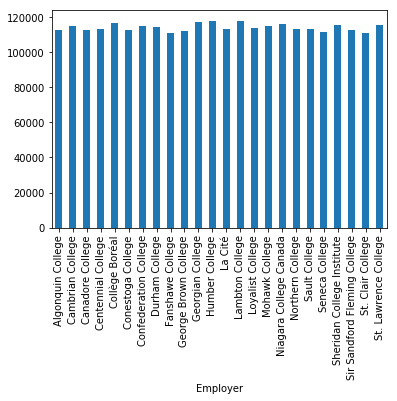

In [39]:
col_employers = colleges.groupby('Employer')

# Plot a bar chart of average salary of the employer
col_avg_salary = col_employers['Salary ($)'].mean()
col_avg_salary.plot.bar()

print('Colleges:\r\n')

# Determine the minimum average salary and name of the university
col_min_avg_salary = min(col_avg_salary)
col_name_min_salary = col_avg_salary.idxmin()
col_employees_for_min =colleges[colleges['Employer'] == col_name_min_salary]
col_num_employees_for_min = len(col_employees_for_min)

# Determine the number of employees with making more than $100,000 and find the lowest salary of the minimum average salary group
col_num_employees_more_100000_for_min = len(col_employees_for_min[col_employees_for_min['Salary ($)'] > 100000])
col_lowest_salary_of_min = min(col_employees_for_min['Salary ($)'])

print('The lowest average salary is ' + str(col_min_avg_salary) + ' at ' + str(col_name_min_salary) + '.\r\nThere are ' + str(col_num_employees_more_100000_for_min) + ' employees making over $100,000CAN out of a total ' + str(col_num_employees_for_min) + ' employees.\r\nThe lowest salary at ' + str(col_name_min_salary) + ' is ' + str(col_lowest_salary_of_min) + '.\r\n\r\n')

# Determine the maximum average salary and name of the university
col_max_avg_salary = max(col_avg_salary)
col_name_max_salary = col_avg_salary.idxmax()
col_employees_for_max =colleges[colleges['Employer'] == col_name_max_salary]
col_num_employees_for_max = len(col_employees_for_max)

# Determine the number of employees with making more than $100,000 and find the lowest salary of the maximum average salary group
col_num_employees_more_100000_for_max = len(col_employees_for_max[col_employees_for_max['Salary ($)'] > 100000])
col_lowest_salary_of_max = min(col_employees_for_max['Salary ($)'])

print('The highest average salary is ' + str(col_max_avg_salary) + ' at ' + str(col_name_max_salary)+ '.\r\nThere are ' + str(col_num_employees_more_100000_for_max) + ' employees making over $100,000CAN out of a total ' + str(col_num_employees_for_max) + ' employees.\r\nThe lowest salary at ' + str(col_name_max_salary) + ' is ' + str(col_lowest_salary_of_max)+ '.')
print('\r\n\r\nThe lowest and highest average salary of the colleges differ by about $7,000.\r\nFrom investigating, there are no obvious reasons why ' + str(col_name_min_salary) + ' is lower than ' + str(col_name_max_salary) + '.\r\n'  + str(col_name_min_salary) + ' has a few science departments, but ' + str(col_name_max_salary) + ' does not, which is the opposite of what would be hypothsized.')


**Question 5**</br>
Select only the `University of Waterloo` group from the Question 4 GroupBy DataFrame; save it as `waterloo`.</br>
Use a Boolean Mask to keep only `Job Title`s that contain `Professor`. How many employees were filtered out in doing this? </br>
Then GroupBy `waterloo` by `Job Title`. Plot the average salary for each `Job Title` group. </br>
Now use `filter` to keep only the `groups` which have at least `10` employees, and again plot the average salary for each `Job Title` group left. </br>
What do you observe?


In [45]:
waterloo = universities[universities['Employer'] == 'University of Waterloo']

# Determine how many professors teach at waterloo and how many employees are not professors
num_employees = len(waterloo)
waterloo_professors = waterloo[waterloo['Job Title'].str.contains('Professor', regex=True)]
num_professors = len(waterloo_professors)
not_professors = num_employees - num_professors
print('There are ' + str(num_professors) + ' professors out of ' + str(num_employees) + ' employees at University of Waterloo.\r\nThere are ' + str(not_professors) + ' employees that are not professors.')

# Group the waterloo professors by job title and get their average salary
waterloo_job_title = waterloo_professors.groupby('Job Title')
waterloo_avg_salary = waterloo_job_title['Salary ($)'].mean()

# Filter the grouped the waterloo professors by job title to have at least 10 employees
waterloo_10_people = waterloo_job_title.filter(lambda x : x['Job Title'].count() >= 10)

# A dataframe is returned, so it is regrouped by Job Title and get their average salary
waterloo_10_people_grouped = waterloo_10_people.groupby('Job Title')
waterloo_avg_salary_10_people = waterloo_10_people_grouped['Salary ($)'].mean()

print('\r\n\r\nI observed a decrease in the number of job titles when filtering the groups to have at least 10 employees because many job titles are only for one person.')

There are 963 professors out of 1357 employees at University of Waterloo.
There are 394 employees that are not professors.


I observed a decrease in the number of job titles when filtering the groups to have at least 10 employees because many job titles are only for one person.


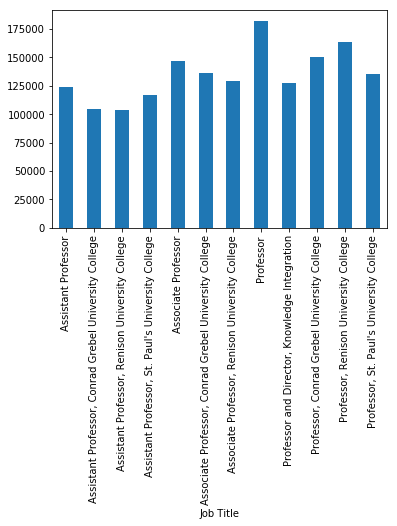

In [46]:
# Make a bar chart of the average salary of the waterloo professors
waterloo_avg_salary.plot.bar()

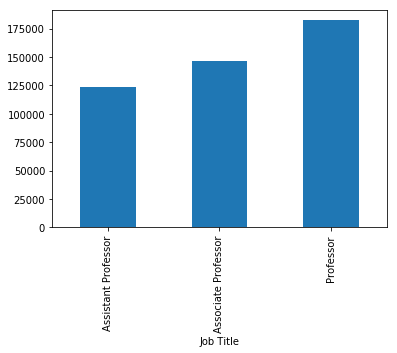

In [47]:
# Make a bar chart of the average salary of the waterloo professors that have at least 10 employees
waterloo_avg_salary_10_people.plot.bar()